In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import torch
from velovi import preprocess_data, VELOVI
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
from eval_utils import cross_boundary_correctness
import matplotlib.pyplot as plt
import pandas as pd
import unitvelo as utv
from os.path import exists
method = 'VeloVI'

Global seed set to 0


(Running UniTVelo 0.2.5)
2022-12-19 13:49:21


In [2]:
datasets = ['HumanDevelopingBrain', 'Pancreas_with_cc', 'DentateGyrus' , 'MouseBoneMarrow', 'MouseErythroid', 'HumanBoneMarrow']
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/'

In [3]:
def add_velovi_outputs_to_adata(adata, vae):
    latent_time = vae.get_latent_time(n_samples=25)
    velocities = vae.get_velocity(n_samples=25, velo_statistic="mean")

    t = latent_time
    scaling = 20 / t.max(0)

    adata.layers["velocity"] = velocities / scaling
    adata.layers["latent_time_velovi"] = latent_time

    adata.var["fit_alpha"] = vae.get_rates()["alpha"] / scaling
    adata.var["fit_beta"] = vae.get_rates()["beta"] / scaling
    adata.var["fit_gamma"] = vae.get_rates()["gamma"] / scaling
    adata.var["fit_t_"] = (
        torch.nn.functional.softplus(vae.module.switch_time_unconstr)
        .detach()
        .cpu()
        .numpy()
    ) * scaling
    adata.layers["fit_t"] = latent_time.values * scaling[np.newaxis, :]
    adata.var['fit_scaling'] = 1.0

HumanDevelopingBrain
Filtered out 17336 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
computing neighbors
    finished (0:00:19) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 267/500:  53%|████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 267/500 [02:13<01:56,  1.99it/s, loss=-1.07e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -1049.105. Signaling Trainer to stop.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/9443 [00:00<?, ?cells/s]

    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('Radial Glia', 'Intermediate \n Progenitor'): -0.3887590119983537, ('Intermediate \n Progenitor', 'Newborn \n Excitatory Neuron'): -0.7322958690043909, ('Newborn \n Excitatory Neuron', 'Immature \n Excitatory Neuron'): -0.7461274585139693, ('Immature \n Excitatory Neuron', 'Mature \n Excitatory Neuron'): 0.5804234424657971}
Total Mean: -0.32168972426272924
# In-cluster Coherence
{'Immature \n Excitatory Neuron': 0.860319, 'Intermediate \n Progenitor': 0.90172684, 'Mature \n Excitatory Neuron': 0.877123, 'Newborn \n Excitatory Neuron': 0.8592026, 'Radial Glia': 0.8872298}
Total Mean: 0.8771201968193054
# Cross-Boundary Direction Correctness (A->B)
{('Radial Glia', 'Intermediate \n Progenitor'): -0.3887590119983537,

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 500/500: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:46<00:00,  4.68it/s, loss=-2.86e+03, v_num=1]
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('Ngn3 high EP', 'Pre-endocrine'): 0.7631586589360471, ('Pre-endocrine', 'Alpha'): 0.7027389645950944, ('Pre-endocrine', 'Beta'): 0.8398258534078906, ('Pre-endocrine', 'Delta'): 0.41387659792915754, ('Pre-endocrine', 'Epsilon'): 0.20644414208646272}
Total Mean: 0.5852088433909304
# In-cluster Coherence
{'Alpha': 0.8796515, 'Beta': 0.90036273, 'Delta': 0.9075009, 'Ductal': 0.87573135, 'Epsilon': 0.8725761, 'Ngn3 high EP': 0.8895288, 'Ngn3 low EP': 0.8789943, 'Pre-endocrine': 0.891757}
Total Mean: 0.8870128393173218
# Cross-Boundary Direction Correctness (A->B)
{('Ngn3 high EP', 'Pre-endocrine'): 0.7631586589360471, ('Pre-endocrine', 'Alpha'): 0.7027389645950944, ('Pre-endocrine', 'Beta'): 0.8398258534078906, ('Pre-e

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
Epoch 323/500:  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 323/500 [00:57<00:31,  5.65it/s, loss=-2.16e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -2031.520. Signaling Trainer to stop.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('nIPC', 'Neuroblast'): 0.8900155840866825, ('Neuroblast', 'Granule immature'): 0.5731025839696055, ('Granule immature', 'Granule mature'): -0.1775429763952478, ('Radial Glia-like', 'Astrocytes'): 0.7356271427263509, ('OPC', 'OL'): 0.4164905033839788}
Total Mean: 0.48753856755427394
# In-cluster Coherence
{'Astrocytes': 0.8311215, 'Cajal Retzius': 0.94230044, 'Cck-Tox': 0.93404233, 'Endothelial': 0.8621086, 'GABA': 0.89178044, 'Granule immature': 0.84782434, 'Granule mature': 0.8192052, 'Microglia': 0.85886496, 'Mossy': 0.8767231, 'Neuroblast': 0.8717388, 'OL': 0.91707754, 'OPC': 0.89255494, 'Radial Glia-like': 0.8875795, 'nIPC': 0.9056495}
Total Mean: 0.8813266158103943
# Cross-Boundary Direction Correctness (A->B

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 358/500:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 358/500 [00:56<00:22,  6.30it/s, loss=-898, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -853.447. Signaling Trainer to stop.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/2600 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('dividing', 'progenitors'): 0.5180984036233139, ('progenitors', 'activating'): 0.7705565446654791}
Total Mean: 0.6443274741443965
# In-cluster Coherence
{'B cell lineage': 0.7414822, 'activating': 0.83155334, 'dividing': 0.79086804, 'macrophages': 0.68390363, 'progenitors': 0.87040013}
Total Mean: 0.7836414575576782
# Cross-Boundary Direction Correctness (A->B)
{('dividing', 'progenitors'): 0.5180984036233139, ('progenitors', 'activating'): 0.7705565446654791}
Total Mean: 0.6443274741443965
# In-cluster Coherence
{'B cell lineage': 0.7414822, 'activating': 0.83155334, 'dividing': 0.79086804, 'macrophages': 0.68390363, 'progenitors': 0.87040013}
Total Mean: 0.7836414575576782
MouseErythroid
Filtered out 47456 genes

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 277/500:  55%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 277/500 [02:21<01:54,  1.96it/s, loss=-1.07e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -1021.198. Signaling Trainer to stop.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.8697113675794322, ('Blood progenitors 2', 'Erythroid1'): 0.18824247204106875, ('Erythroid1', 'Erythroid2'): -0.08248728868601433, ('Erythroid2', 'Erythroid3'): -0.8019662432401701}
Total Mean: 0.04337507692357917
# In-cluster Coherence
{'Blood progenitors 1': 0.83727264, 'Blood progenitors 2': 0.8782306, 'Erythroid1': 0.90190375, 'Erythroid2': 0.8946641, 'Erythroid3': 0.92419386}
Total Mean: 0.8872529864311218
# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.8697113675794322, ('Blood progenitors 2', 'Erythroid1'): 0.18824247204106875, ('Erythroid1', 'Erythroid2'): -0.08248728868601433, ('Erythroid2', 'Erythroid3'): -0.

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 476/500:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 476/500 [02:32<00:07,  3.12it/s, loss=-1.53e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -1476.610. Signaling Trainer to stop.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/64 cores)


  0%|          | 0/5780 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('HSC_1', 'Ery_1'): -0.1656329803788922, ('HSC_1', 'HSC_2'): -0.33400131713405984, ('Ery_1', 'Ery_2'): -0.19383595955933877}
Total Mean: -0.23115675235743027
# In-cluster Coherence
{'CLP': 0.87760556, 'DCs': 0.8968499, 'Ery_1': 0.9265559, 'Ery_2': 0.9321028, 'HSC_1': 0.8962503, 'HSC_2': 0.9036006, 'Mega': 0.91160804, 'Mono_1': 0.8947838, 'Mono_2': 0.8988584, 'Precursors': 0.9042976}
Total Mean: 0.9042512774467468
# Cross-Boundary Direction Correctness (A->B)
{('HSC_1', 'Ery_1'): -0.1656329803788922, ('HSC_1', 'HSC_2'): -0.33400131713405984, ('Ery_1', 'Ery_2'): -0.19383595955933877}
Total Mean: -0.23115675235743027
# In-cluster Coherence
{'CLP': 0.87760556, 'DCs': 0.8968499, 'Ery_1': 0.9265559, 'Ery_2': 0.9321028, '

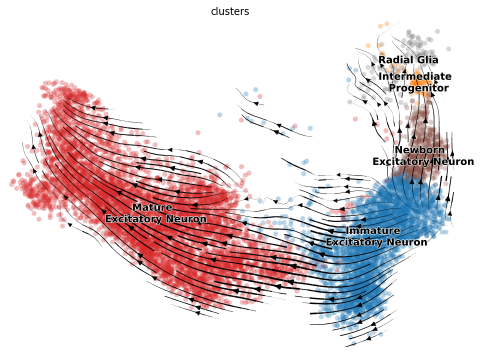

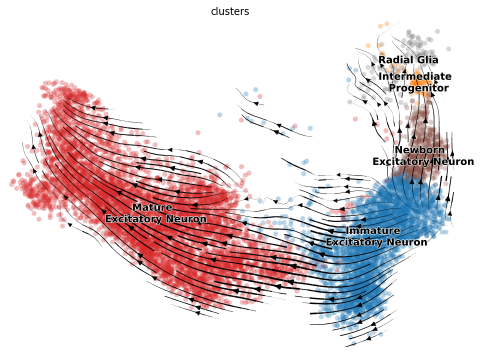

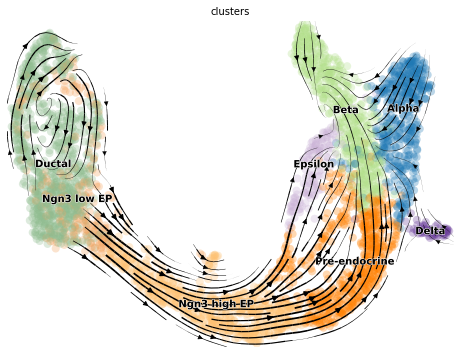

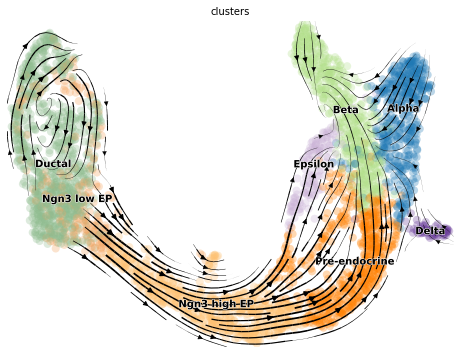

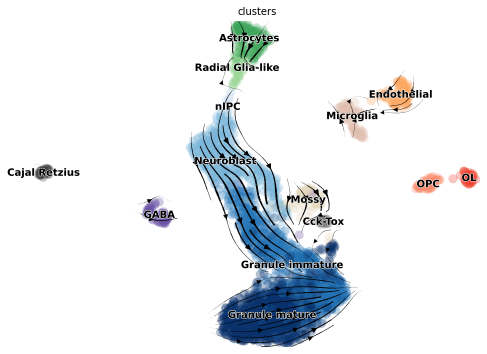

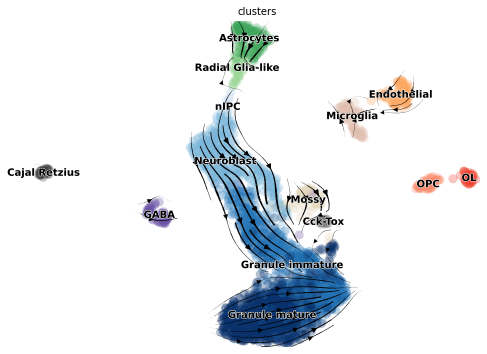

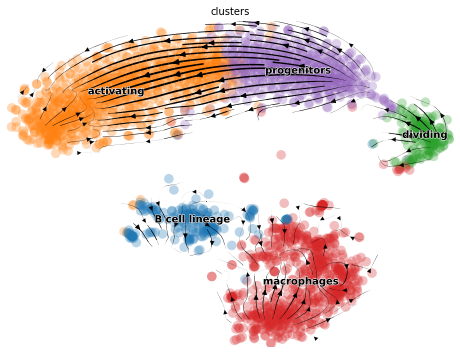

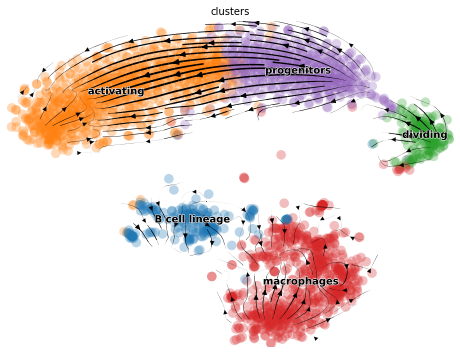

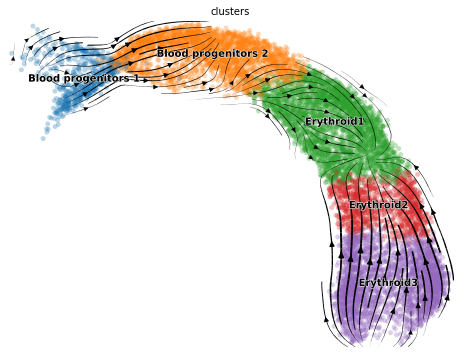

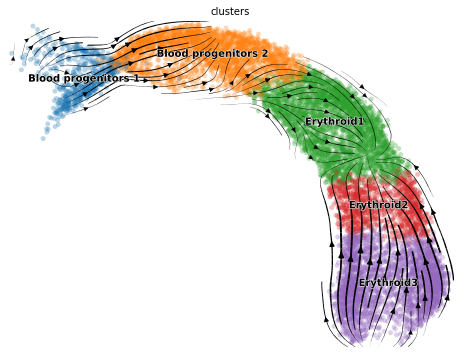

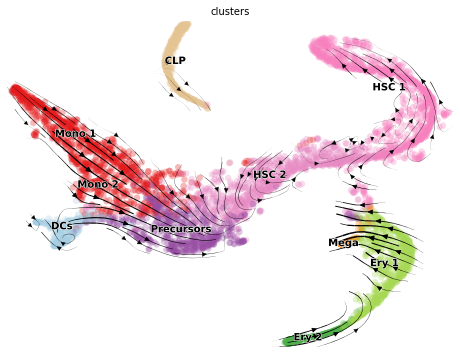

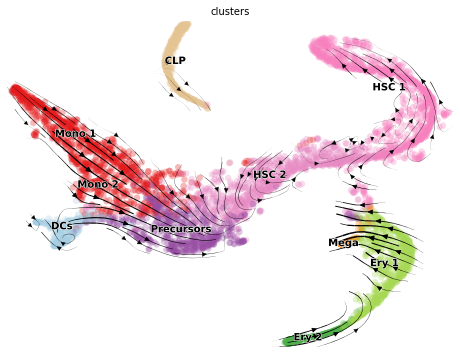

In [4]:
for dataset in datasets:
    print(dataset)
    adata = sc.read_h5ad(data_dir + dataset + '/' + dataset + '_anndata.h5ad')
    scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=3000)
    scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
    adata = preprocess_data(adata)
    VELOVI.setup_anndata(adata, spliced_layer="Ms", unspliced_layer="Mu")
    vae = VELOVI(adata)
    vae.train()
    add_velovi_outputs_to_adata(adata, vae)
    scv.pp.neighbors(adata)
    scv.tl.velocity_graph(adata)
    scv.tl.velocity_embedding(adata)
    fix, ax = plt.subplots(1, 1, figsize = (8, 6))
    scv.pl.velocity_embedding_stream(adata, basis='umap', save = False, vkey='velocity',
                                     show = False, ax = ax)
    plt.savefig(save_dir + 'UMAPs/' + dataset + '_UMAP_VeloVI.png')
    # Calculate performance metrics:
    file = open(data_dir + dataset + '/' + dataset + '_groundTruth.pickle' ,'rb')
    ground_truth = pickle.load(file)
    metrics = utv.evaluate(adata, ground_truth, 'clusters', 'velocity')
    if exists(save_dir + dataset + '_CBDC_scores.csv'):
        tab = pd.read_csv(save_dir + dataset + '_CBDC_scores.csv', index_col = 0)
    else:
        tab = pd.DataFrame(columns = list(metrics['Cross-Boundary Direction Correctness (A->B)'].keys()) + ['Mean'],
                 index = [method])
    cb_score = [np.mean(metrics['Cross-Boundary Direction Correctness (A->B)'][x])
                for x in metrics['Cross-Boundary Direction Correctness (A->B)'].keys()]
    tab.loc[method,:] = cb_score + [np.mean(cb_score)]
    tab.to_csv(save_dir + dataset + '_CBDC_scores.csv')
    metrics = utv.evaluate(adata, ground_truth, 'clusters', 'velocity')
    if exists(save_dir + dataset + '_ICC_scores.csv'):
        tab = pd.read_csv(save_dir + dataset + '_ICC_scores.csv', index_col = 0)
    else:
        tab = pd.DataFrame(columns = list(np.unique(np.concatenate(ground_truth))) + ['Mean'],
                 index = [method])
    icc_score = [np.mean(metrics['In-cluster Coherence'][x]) for x in np.unique(np.concatenate(ground_truth))]
    tab.loc[method,:] = icc_score + [np.mean(icc_score)]
    tab.to_csv(save_dir + dataset + '_ICC_scores.csv')
    fix, ax = plt.subplots(1, 1, figsize = (8, 6))
    scv.pl.velocity_embedding_stream(adata, basis='umap', save = False, vkey='velocity',
                                     show = False, ax = ax)
    plt.savefig(save_dir + 'UMAPs/' + dataset + '_UMAP_' + method + '.png')  